In [120]:
import MDAnalysis
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import glob
import numpy as np
import csv
from scipy.stats import linregress

### nAtoms vs Timing correlations

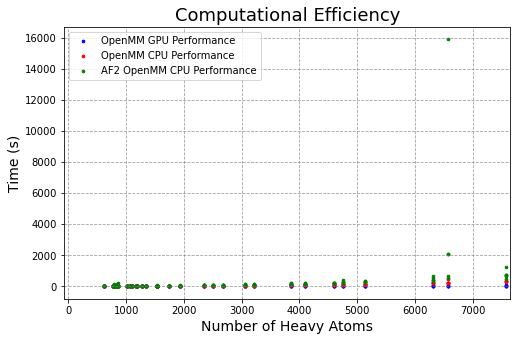

In [133]:
# prepping figure
fig = plt.figure(figsize=(8,5))
plt.ylabel('Time (s)',size=14)
plt.xlabel('Number of Heavy Atoms',size=14)
plt.title('Computational Efficiency',size=18)


### OPENMM GPU PLATFORM 
output_dir = "/gpfs/alpine/proj-shared/bip198/minimize_af/script_home/casp14_refinement2/"
timing_csv = output_dir + 'timings.csv'
with open(timing_csv) as timing_file:
    csv_reader = csv.reader(timing_file)
    header = []
    header = next(csv_reader)
    timing_data = []
    for row in csv_reader:
        row = [row[0],row[1],float(row[2]),float(row[3]),row[4]]
        timing_data.append(row)

timing_data_array = np.array(timing_data)
n_atoms_vs_time = []
for row in timing_data_array:
    u = MDAnalysis.Universe(row[-1])
    hvy_atoms = u.select_atoms('not name H*')
    dt = float(row[3]) - float(row[2])
    n_atoms_vs_time.append([hvy_atoms.n_atoms,dt])
n_atoms_vs_time = np.array(n_atoms_vs_time)

plt.scatter(n_atoms_vs_time[:,0],n_atoms_vs_time[:,1],s=7,c='b',label='OpenMM GPU Performance')
#test = linregress(n_atoms_vs_time[:,0],n_atoms_vs_time[:,1])
#x = np.arange(0,np.max(n_atoms_vs_time[:,0])+1)
#y = np.array([test.slope * i + test.intercept for i in x])
#plt.plot(x,y,lw=2,c='k',label='OpenMM GPU Performance\ny = %.3f * x + %.3f\n'%(test.slope,test.intercept)+r'R$^{2}$ = %.3f'%(test.rvalue**2))
#plt.plot(x,y,lw=2,c='k',label='OpenMM GPU Performance')

### OPENMM CPU PLATFORM 
output_dir = "/gpfs/alpine/proj-shared/bip198/minimize_af/cpu_pipeline/"
timing_csv = output_dir + 'timings.csv'

with open(timing_csv) as timing_file:
    csv_reader = csv.reader(timing_file)
    header = []
    header = next(csv_reader)
    timing_data = []
    for row in csv_reader:
        row = [float(row[0]),float(row[1]),row[2]]
        timing_data.append(row)

timing_data_array = np.array(timing_data)
n_atoms_vs_time = []
for row in timing_data_array:
    u = MDAnalysis.Universe(row[-1])
    hvy_atoms = u.select_atoms('not name H*')
    dt = float(row[1]) - float(row[0])
    n_atoms_vs_time.append([hvy_atoms.n_atoms,dt])
n_atoms_vs_time = np.array(n_atoms_vs_time)

plt.scatter(n_atoms_vs_time[:,0],n_atoms_vs_time[:,1],s=7,c='r',label='OpenMM CPU Performance')
#test = linregress(n_atoms_vs_time[:,0],n_atoms_vs_time[:,1])
#x = np.arange(0,np.max(n_atoms_vs_time[:,0])+1)
#y = np.array([test.slope * i + test.intercept for i in x])
#plt.plot(x,y,lw=2,c='k',label='OpenMM CPU Performance\ny = %.3f * x + %.3f\n'%(test.slope,test.intercept)+r'R$^{2}$ = %.3f'%(test.rvalue**2))
#plt.plot(x,y,lw=2,c='k',label='OpenMM CPU Performance')

### AF2 OPENMM CPU PLATFORM 
af_file_dir = "/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/"
refined_log_files = glob.glob(af_file_dir+"*/timings_str.json")

timings = []
for i, log_file in enumerate(refined_log_files):
    temp_path = ''
    for elem in log_file.split('/')[:-1]:
        temp_path += elem+'/'
    with open(log_file,'r') as test:
        temp_timings = []
        for line in test:
            if 'relax_model' in line:
                temp_timings.append([temp_path+'relaxed_model_'+line.split('relax_model_')[1][0]+'.pdb',float(line.split()[-1][:-1])])
        timings += temp_timings

n_atoms_vs_time = []
timing_data_array = np.array(timings)
for row in timing_data_array:
    u = MDAnalysis.Universe(row[0])
    hvy_atoms = u.select_atoms('not name H*')
    dt = float(row[1])
    n_atoms_vs_time.append([hvy_atoms.n_atoms,dt])
n_atoms_vs_time = np.array(n_atoms_vs_time)

plt.scatter(n_atoms_vs_time[:,0],n_atoms_vs_time[:,1],s=7,c='g',label='AF2 OpenMM CPU Performance')
#test = linregress(n_atoms_vs_time[:,0],n_atoms_vs_time[:,1])
#x = np.arange(0,np.max(n_atoms_vs_time[:,0])+1)
#y = np.array([test.slope * i + test.intercept for i in x])
#plt.plot(x,y,lw=2,c='k',label='AF2 OpenMM CPU Performance\ny = %.3f * x + %.3f\n'%(test.slope,test.intercept)+r'R$^{2}$ = %.3f'%(test.rvalue**2))
#plt.plot(x,y,lw=2,c='k',label='AF2 OpenMM CPU Performance')

plt.legend()
plt.xlim((0-np.max(n_atoms_vs_time[:,0])*0.01,np.max(n_atoms_vs_time[:,0])+np.max(n_atoms_vs_time[:,0])*0.01))
#plt.ylim((0-np.max(n_atoms_vs_time[:,1])*0.01,np.max(n_atoms_vs_time[:,1])+np.max(n_atoms_vs_time[:,1])*0.01))
#plt.ylim((0-2200*0.01,2200+2200*0.01))

plt.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75)
plt.savefig(output_dir + 'n_atom_vs_timing_correlation.png',dpi=600,transparent=True)
plt.show()

In [151]:
plt.close()